**Connect to Google Drive and import libraries**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from contextlib import redirect_stdout

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, advanced_activations
from keras.layers import Activation, Dropout,Flatten,Dense
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
import numpy as np
import itertools
import keras


**Dowload data**

In [3]:
keras.utils.data_utils._extract_archive (
    '/content/gdrive/My Drive/Data/train.zip', path = 'train')
keras.utils.data_utils._extract_archive (
    '/content/gdrive/My Drive/Data/val.zip', path = 'val')
keras.utils.data_utils._extract_archive (
    '/content/gdrive/My Drive/Data/test.zip', path = 'test')

True

**Create Image Generator**

In [0]:
img_width, img_height = 48, 48
input_share = (img_width, img_height, 1)
epochs = 30
batch_size = 128
nb_train_samples = 20165
nb_validation_samples = 3640
nb_test_samples = 4494
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

In [13]:
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(img_width, img_height),
                                              batch_size=batch_size, class_mode='categorical',
                                              shuffle=1, color_mode='grayscale')
val_generator = datagen.flow_from_directory(val_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size, class_mode='categorical', color_mode='grayscale')
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(img_width, img_height),
                                             batch_size=batch_size, class_mode='categorical',
                                             color_mode='grayscale')
print(val_generator.class_indices)

Found 20165 images belonging to 7 classes.
Found 3640 images belonging to 7 classes.
Found 4494 images belonging to 7 classes.
{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sadness': 4, 'Scorn': 5, 'Surprise': 6}


In [0]:
y_train = train_generator[0][1].astype('uint8')
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [12]:
class_weights

array([1.14285714, 1.30612245, 0.73142857, 0.91428571, 0.73142857,
       1.21904762, 1.40659341])

**Confusion matrix function**

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

**Structure Network**

In [0]:
сheckpoint = ModelCheckpoint("Results/{epoch:02d}-{val_categorical_accuracy:.4f}-{val_loss:.4f}.hdf5",
          save_best_only=1)

Epoch 1/30
157/157 [==============================] - 8s 54ms/step - loss: 3.4625 - categorical_accuracy: 0.2871 - val_loss: 6.2719 - val_categorical_accuracy: 0.0405
Epoch 2/30
157/157 [==============================] - 8s 48ms/step - loss: 1.4340 - categorical_accuracy: 0.4420 - val_loss: 3.3057 - val_categorical_accuracy: 0.1113
Epoch 3/30
157/157 [==============================] - 8s 48ms/step - loss: 1.2934 - categorical_accuracy: 0.4983 - val_loss: 4.0687 - val_categorical_accuracy: 0.1019
Epoch 4/30
157/157 [==============================] - 8s 49ms/step - loss: 1.2058 - categorical_accuracy: 0.5344 - val_loss: 1.4648 - val_categorical_accuracy: 0.4843
Epoch 5/30
157/157 [==============================] - 8s 49ms/step - loss: 1.1361 - categorical_accuracy: 0.5682 - val_loss: 1.5100 - val_categorical_accuracy: 0.4240
Epoch 6/30
157/157 [==============================] - 8s 48ms/step - loss: 1.0792 - categorical_accuracy: 0.5891 - val_loss: 1.2206 - val_categorical_accuracy: 0.576

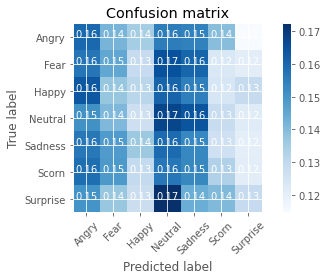

In [26]:
lr=0.001
model=0
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_share))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(2048))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr), metrics=['categorical_accuracy'])

H=model.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,
                          validation_data=val_generator, class_weight=[1.12285714, 1.30612245, 0.73142857, 0.91428571, 0.73142857,
                                                         1.21904762, 1.40659341],
                          validation_steps=nb_validation_samples // batch_size, callbacks=[сheckpoint])

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Точность на тестовых данных: %.2f%%" % (scores[1] * 100))
plt.style.use("ggplot")
N = epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["categorical_accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_categorical_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("Results/"+str(round(max(H.history["val_categorical_accuracy"]), 3))+'+'+str(lr)+".png")   

with open("Results/"+str(round(max(H.history["val_categorical_accuracy"]), 3))+'+'+str(lr)+".txt", 'w') as f:
    with redirect_stdout(f):
        model.summary()
plt.clf()
Y_pred = model.predict_generator(train_generator, nb_train_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
ConMat=confusion_matrix(train_generator.classes, y_pred)
plot_confusion_matrix(ConMat,train_generator.class_indices,normalize=1)
plt.savefig("Results/"+str(round(max(H.history["val_categorical_accuracy"]), 3))+'matrix+'+str(lr)+".png")
try:
    model.save('/content/gdrive/My Drive/Models/model_self.h5')
except OSError:
    model.save('/content/drive/My Drive/Models/model_self.h5')

In [0]:
try:
    model.save('/content/gdrive/My Drive/Models/model_self.h5')
except OSError:
    model.save('/content/drive/My Drive/Models/model_self.h5')